In [42]:
import pandas as pd
import numpy as np
import string
import re
import nltk

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Download necessary NLTK resources (only run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/guyparsadanov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/guyparsadanov/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/guyparsadanov/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [43]:
# Define the file path and column names
file_path = '/Users/guyparsadanov/Downloads/Iron-Hack-Work/W4/project-3-nlp/training_data_lowercase copy.csv'  # Replace with your file path
column_names = ['label', 'text']

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

# Convert labels to integers (just in case they aren't)
df['label'] = df['label'].astype(int)

# Display the first few rows of the dataset
print(df.head())

   label                                               text
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...


Preprocessing

In [44]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

# Preprocessing function
def preprocess_text(text):
    # Remove punctuation and numbers
    text = re.sub(f"[{string.punctuation}]", " ", text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers

    # Remove single characters from the start
    text = re.sub(r'^[a-zA-Z]\s+', ' ', text)

    # Substitute multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove all special characters
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Keep only letters and spaces
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize and remove stopwords, then lemmatize
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]


    
    return ' '.join(tokens)

# Apply preprocessing to the dataset
df['clean_text'] = df['text'].apply(preprocess_text)

# Display the cleaned text
print(df[['text', 'clean_text']].head())

                                                text  \
0  donald trump sends out embarrassing new year‚s...   
1  drunk bragging trump staffer started russian c...   
2  sheriff david clarke becomes an internet joke ...   
3  trump is so obsessed he even has obama‚s name ...   
4  pope francis just called out donald trump duri...   

                                          clean_text  
0  donald trump sends out embarrassing new year s...  
1  drunk bragging trump staffer started russian c...  
2  sheriff david clarke becomes an internet joke ...  
3  trump is so obsessed even obama s name coded i...  
4  pope francis just called out donald trump duri...  


 TF-IDF Vectorization with Unigrams and Bigrams

In [34]:
# TF-IDF Vectorization with Unigrams and Bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])

# Define features and labels
X = X_tfidf
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train SVM

In [35]:
# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear', C=1.0)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

Results for SVM Classifier:

Accuracy: 0.9460

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      3529
           1       0.94      0.95      0.94      3302

    accuracy                           0.95      6831
   macro avg       0.95      0.95      0.95      6831
weighted avg       0.95      0.95      0.95      6831



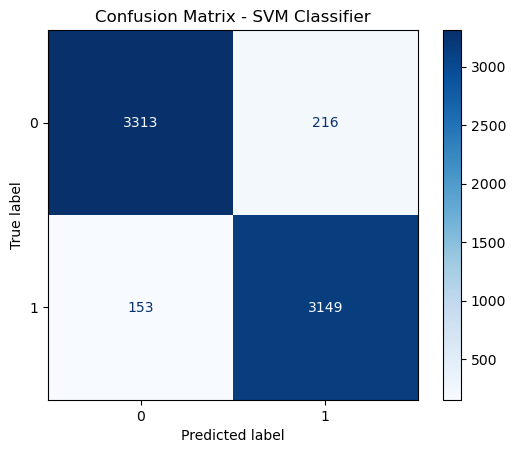

In [39]:
# Evaluate the model
print("Results for SVM Classifier:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, cmap='Blues')
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

Preadict on real data

1. Load data

In [79]:
# Define the file path and column names
file_path_pred = '/Users/guyparsadanov/Downloads/Iron-Hack-Work/W4/project-3-nlp/testing_data_lowercase_nolabels.csv'  # Replace with your file path
column_names_pred = ['label', 'text']

# Load the dataset into a pandas DataFrame
prediction = pd.read_csv(file_path_pred, sep='\t', header=None, names=column_names)

# Convert labels to integers (just in case they aren't)
#df['label'] = df['label'].astype(int)

# Display the first few rows of the dataset
print(prediction.head())

  label                                               text
0     2  copycat muslim terrorist arrested with assault...
1     2  wow! chicago protester caught on camera admits...
2     2   germany's fdp look to fill schaeuble's big shoes
3     2  mi school sends welcome back packet warning ki...
4     2  u.n. seeks 'massive' aid boost amid rohingya '...


2. Preprocess

In [80]:
prediction['clean_text'] = prediction['text'].apply(preprocess_text)

# Display the cleaned text
print(prediction[['text', 'clean_text']].head())

                                                text  \
0  copycat muslim terrorist arrested with assault...   
1  wow! chicago protester caught on camera admits...   
2   germany's fdp look to fill schaeuble's big shoes   
3  mi school sends welcome back packet warning ki...   
4  u.n. seeks 'massive' aid boost amid rohingya '...   

                                          clean_text  
0  copycat muslim terrorist arrested with assault...  
1  wow chicago protester caught on camera admits ...  
2    germany s fdp look to fill schaeuble s big shoe  
3  school sends welcome back packet warning kid a...  
4  n seek massive aid boost amid rohingya emergen...  


In [83]:
# Transform the cleaned testing data
X_test_real = tfidf_vectorizer.transform(prediction['clean_text'])

In [82]:
print({len(prediction)})

{9984}


In [84]:
# Predict on the real testing data
predictions_real = svm_model.predict(X_test_real)

# Display predictions
print(predictions_real)

[0 0 1 ... 1 0 0]


In [85]:
print({len(predictions_real)})

{9984}


In [87]:
# Add predictions to the DataFrame
prediction['predictions'] = predictions_real

# Save to CSV
prediction[['predictions', 'text']].to_csv('predictions.csv', index=False)